Nome: **Angela Crepaldi**

Universidade Federal de Santa Catarina<br>
Departamento de Engenharia Elétrica e Eletrônica<br>
EEL7514/EEL7513 - Introdução ao Aprendizado de Máquina
$\newcommand{\bX}{\mathbf{X}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\RR}{\mathbb{R}}$


# Exercício 2: Regressão Linear

Neste exercício você irá treinar um modelo de regressão linear e o usará para fazer predições. Além disso, você investigará a adição de novos atributos e a necessidade de regularização.

# Conjunto de dados

Para facilitar a análise, o conjunto de dados utilizado neste exercício possui um único atributo $x \in \RR$ (e um valor-alvo $y \in \RR$). Além desta peculiaridade, é importante ressaltar duas grandes diferenças em relação ao que se encontra em problemas reais:
- O conjunto de dados é sintético, isto é, gerado por simulação;
- O conjunto de treinamento tem tamanho **muito menor** que os conjuntos de validação e teste.

A razão para esta escolha é que um conjunto de treinamento pequeno nos permitirá observar mais facilmente o fenômeno de overfitting, enquanto conjuntos de validação e teste suficientemente grandes nos permitirá ter confiança na estimativa de desempenho do modelo medida nestes conjuntos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def gen_data(n_samples, x_scale=[0,1], noise=0.5):
    '''Generate univariate regression dataset'''
    x = np.sort(np.random.rand(n_samples))
    y = 6*(-1/6 + x + (x > 1/3)*(2/3-2*x) + (x > 2/3)*(2*x-4/3)) + noise*np.random.randn(n_samples)
    x = x_scale[0] + (x_scale[1]-x_scale[0])*x
    X = x.reshape(-1,1)
    return X, y

def plot_data(X, y):
    '''Plot univariate regression dataset'''
    assert len(X.shape) == 2 and len(y.shape) == 1
    plt.plot(X[:,0],y,'b.'); plt.xlabel('x'); plt.ylabel('y');
    return

def plot_prediction(model, X, y, n_points=100):
    '''Plot dataset and predictions for a univariate regression model'''
    plot_data(X,y)
    if n_points is not None:
        xx = np.linspace(X.min(),X.max(),n_points)
        yy = model.predict(xx.reshape(-1,1))
        plt.plot(xx,yy,'r-')
    y_pred = model.predict(X)
    plt.plot(X[:,0],y_pred,'r.')
    plt.legend(['True', 'Predicted'])
    return

O conjunto de dados pode ser gerado e visualizado pelos comandos abaixo.

(30, 1) (30,)
(1000, 1) (1000,)
(1000, 1) (1000,)


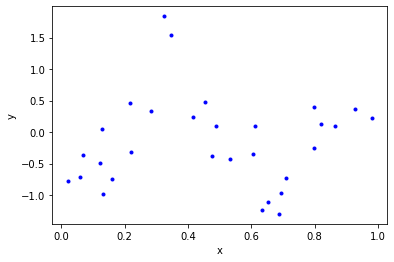

In [2]:
np.random.seed(2019*2)
X, y = gen_data(n_samples=30)
X_val, y_val = gen_data(n_samples=1000)
X_test, y_test = gen_data(n_samples=1000)

print(X.shape, y.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

# Plot only the training data!
plot_data(X,y)

# 1. Regressão linear simples


1. Treine um modelo de regressão linear simples, $\hat{y} = w_0 + w_1 x$, sobre o conjunto de treinamento
- Calcule o erro quadrático médio (MSE) da predição sobre o conjunto de treinamento e sobre o conjunto de teste
- Trace o gráfico da predição sobre o conjunto de treinamento
- Você diria que o modelo treinado está sofrendo de underfitting, overfitting ou nenhum dos dois? Explique.
- (OPCIONAL) Experimente também a função `model.score()` do sklearn. Qual a relação entre este valor e o MSE? É possível calcular um a partir do outro? Como?

#### Funções úteis:
```python
sklearn.linear_model.LinearRegression()
sklearn.metrics.mean_squared_error()
plot_prediction() # fornecida acima
```

Train MSE: 0.517264352011368
Test MSE: 0.5981907941434731


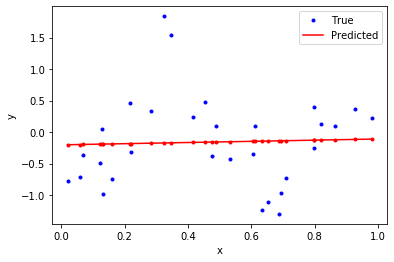

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1.
model = LinearRegression()
model.fit(X, y)

# 2.
y_pred = model.predict(X)
mse_train = mean_squared_error(y, y_pred)
print('Train MSE:', mse_train)
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
print('Test MSE:', mse_test)

# 3.
plot_prediction(model, X, y)

4. Acredito que o modelo treinado esteja sofrendo *underfitting* pois o modelo de predição não está relacionando os atributos aos valores-alvos.

In [6]:
# 5.
model.score(X, y)

0.0013485634441275929

In [8]:
model.score(X_test, y_test_pred)

1.0

# 2. Adicionando atributos (regressão linear com múltiplas variáveis)

Agora, estenderemos o modelo de regressão linear adicionando atributos polinomiais de grau até $d$, isto é, o modelo será dado por $\hat{y} = w_0 + w_1 x + w_2 x^2 + \cdots + w_d x^d$. Note que esse modelo possui um hiperparâmetro, $d$, que precisa ser determinado. **A boa prática recomenda nunca utilizar o conjunto de teste até que todos os hiperparâmetros sejam escolhidos**, utilizando, ao invés disso, o conjunto de validação.

1. Adicione atributos polinomiais ao modelo de regressão linear, escolha algum valor de $d$ e treine o modelo
- Calcule o erro quadrático médio (MSE) da predição sobre o conjunto de treinamento e sobre o **conjunto de validação**
- Trace o gráfico da predição sobre o conjunto de treinamento
- Repita os passos acima experimentando outros valores de $d$. O que você observa?
- Especificamente, para o caso $d=12$, você diria que o modelo está sofrendo de underfitting, overfitting ou nenhum dos dois?

#### Funções úteis:
```python
sklearn.preprocessing.PolynomialFeatures()
sklearn.pipeline.make_pipeline()
```

## Busca de hiperparâmetros

6. Trace um gráfico do MSE de treinamento e de validação em função do grau $d$. Se necessário, ajuste a escala vertical para melhor visualização.
- Comente sobre o que você observa no gráfico. Em particular, explique o comportamento das duas curvas e por que esse comportamento era esperado.
- Determine o valor de $d$ que minimiza o erro no conjunto de validação.
- Para este valor de $d$, calcule o MSE de treinamento, de validação **e de teste** e trace o gráfico da predição sobre o conjunto de treinamento.
- (OPCIONAL) O erro de validação parece representativo do erro de teste? O que você acha que aconteceria se o conjunto de validação fosse significativamente menor (por exemplo, com 30 amostras ao invés de 1000)?

#### Funções úteis:
```python
np.arange()
np.zeros() # útil para pré-alocação de vetores
for i in range(len(v)): # percorre os elementos de v
plt.ylim()
np.argmin()
```

# 3. Regularização

Agora, adicionaremos regularização $\ell_2$ ao modelo, o que introduz mais um hiperparâmetro, o parâmetro de regularização $\lambda$.

1. Retornando ao modelo com $d=12$, agora com regularização $\ell_2$ (*ridge regression*), experimente alguns valores de $\lambda$ e observe os resultados no gráfico da predição sobre o conjunto de treinamento. (Você logo perceberá a necessidade de usar $\lambda \ll 1$.) Em particular, o que acontece quando $\lambda$ é comparativamente grande?
- Trace um gráfico do MSE de treinamento e de validação em função de $\log \lambda$.
- Comente sobre o que você observa no gráfico. Em particular, explique o comportamento das duas curvas e por que esse comportamento era esperado.
- Determine o valor de $\lambda$ que minimiza o erro no conjunto de validação.
- Para este valor de $\lambda$, calcule o MSE de treinamento, de validação e de teste e trace o gráfico da predição sobre o conjunto de treinamento.
- A partir destes resultados, comente sobre o efeito da regularização em um modelo com capacidade elevada comparativamente ao tamanho do conjunto de treinamento.
- (OPCIONAL) O que você acha que ocorreria se o conjunto de treinamento fosse relativamente grande (por exemplo, com 1000 amostras ao invés de 30)? Ainda seria importante regularizar?

#### Dicas

- Não utilize `lambda` como nome de variável, pois no Python `lambda` é uma palavra reservada (operador para criar funções anônimas). Uma sugestão é abreviar para `lamb`.

- Funções úteis:
```python
sklearn.linear_model.Ridge()
np.linspace()
np.exp()
np.log()
```
Note que a função `Ridge()` utiliza `alpha` (ao invés de $\lambda$) como parâmetro de regularização.

## (OPCIONAL) Busca de hiperparâmetros (2)

8. Determine o par $(d,\lambda)$ que minimiza o erro no conjunto de validação.
- Para estes valores de $d$ e $\lambda$, calcule o MSE de treinamento, de validação e de teste e trace o gráfico da predição sobre o conjunto de treinamento.
- Compare o erro de teste encontrado com o resultante da melhor escolha de $d$ sem regularização.

#### Dicas
- Uma forma de implementar a busca pelo par $(d,\lambda)$ é organizar a implementação em dois loops, primeiramente em $d$ e em seguida em $\lambda$.
- Pode ser conveniente encapsular o loop interno (busca por $\lambda$) em uma função que tem como entrada $d$ e retorna $\lambda$.
- Os códigos já desenvolvidos podem ser reutilizados com poucas adaptações.

# 4. Implementação em Python

Finalmente, você irá escrever sua própria implementação dos modelos acima, usando uma interface parcialmente compatível com a biblioteca `sklearn`. Além das funções `fit()` e `predict()`, a classe do modelo deverá conter uma função `mse()` para cálculo do MSE (ao invés da função `score()` do `sklearn`).

É suficiente implementar um modelo de regressão linear com atributos polinomiais de grau $d$ e regularização $\ell_2$ com parâmetro $\lambda$; caso se deseje um modelo sem atributos polinomiais (linear na variável de entrada) ou sem regularização, é suficiente fazer $d=1$ ou $\lambda=0$, respectivamente.

1. Complete a classe abaixo, preenchendo as linhas indicadas (ou fique à vontade para reimplementar da forma que desejar).
- Teste-a com os comandos da célula seguinte, para garantir que sua implementação está correta.
- (OPCIONAL) Para este conjunto de dados, o que ocorre quando usamos $d \geq 10$ e $\lambda=0$? Por que isso ocorre? Isto deixa de ocorrer se usarmos $\lambda=10^{-12}$? Por quê?

#### Funções úteis:
```python
np.ones()
np.c_[]
np.diag()
np.r_[]
np.linalg.inv()
np.linalg.solve()
np.mean()
```

In [3]:
class Model():
    # Univariate linear regression with polinomial features and L2 regularization
    def __init__(self, d=1, lamb=0):
        # Initialization
        self.d = d
        self.lamb = lamb
        return
    
    def _add_powers(self, X):
        # Add powers of X (including a column of ones)
        X_new = ???
        for i in range(1,self.d+1):
            X_new = ???
        return X_new
    
    def fit(self, X, y):
        X = self._add_powers(X)
        L = ???
        assert np.linalg.matrix_rank(X.T @ X + self.lamb*L) == X.shape[1], 'Singular matrix'
        self.w = ???
        return

    def predict(self, X):
        X = self._add_powers(X)
        y_pred = ???
        return y_pred
    
    def mse(self, X, y):
        J = ???
        return J

SyntaxError: invalid syntax (<ipython-input-3-1cd7c94da698>, line 11)

In [ ]:
# scikit-learn
model = make_pipeline(PolynomialFeatures(4, include_bias=False),Ridge(1e-5))
model.fit(X,y)
ridge = model.steps[1][1]
w = np.r_[ridge.intercept_, ridge.coef_]
print('w =',w)

# own implementation
model = Model(d=4, lamb=1e-5)
model.fit(X,y)
print('w =',model.w)
print('Training MSE  : %f' % model.mse(X,y));
print('Validation MSE: %f' % model.mse(X_val,y_val));
plot_prediction(model, X, y)
plt.show()